# Importing Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data

In [2]:
df = pd.read_csv('mushrooms 2.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Data Inspection

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe([0]).T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [6]:
# checking data types
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [7]:
# checking missing values per column
df.isnull().sum().sort_values(ascending=False)

class                       0
stalk-surface-above-ring    0
population                  0
spore-print-color           0
ring-type                   0
ring-number                 0
veil-color                  0
veil-type                   0
stalk-color-below-ring      0
stalk-color-above-ring      0
stalk-surface-below-ring    0
stalk-root                  0
cap-shape                   0
stalk-shape                 0
gill-color                  0
gill-size                   0
gill-spacing                0
gill-attachment             0
odor                        0
bruises                     0
cap-color                   0
cap-surface                 0
habitat                     0
dtype: int64

In [8]:
# percentage of missing values by column 
df.isnull().mean()*100

class                       0.0
cap-shape                   0.0
cap-surface                 0.0
cap-color                   0.0
bruises                     0.0
odor                        0.0
gill-attachment             0.0
gill-spacing                0.0
gill-size                   0.0
gill-color                  0.0
stalk-shape                 0.0
stalk-root                  0.0
stalk-surface-above-ring    0.0
stalk-surface-below-ring    0.0
stalk-color-above-ring      0.0
stalk-color-below-ring      0.0
veil-type                   0.0
veil-color                  0.0
ring-number                 0.0
ring-type                   0.0
spore-print-color           0.0
population                  0.0
habitat                     0.0
dtype: float64

In [9]:
# how many total missing values 

missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data missing
(total_missing/total_cells) * 100

0.0

In [10]:
# removing all missing values / axis= 1 is columns, axis= 0 is rows
df.dropna(inplace=True)

In [11]:
# replacing missing values backward fill 
df.fillna(method= 'bfill', inplace=True)

In [12]:
# checking duplicate values
df.duplicated().sum()

0

In [13]:
# dropping duplicate values 
df.drop_duplicates(inplace=True)

In [14]:
df.value_counts('class')

class
e    4208
p    3916
dtype: int64

# Data Exploratory Analysis

<AxesSubplot:xlabel='class', ylabel='count'>

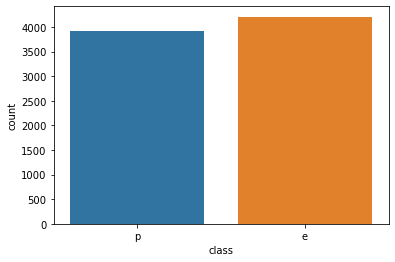

In [15]:
sns.countplot(x='class', data=df)

<AxesSubplot:xlabel='odor', ylabel='count'>

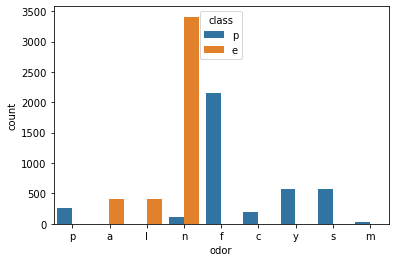

In [16]:
sns.countplot(x='odor',hue='class', data=df)

# Data Preprocessing 

In [17]:
# Converting target class 
df['class'] = df['class'].map({'p':1,'e':0})

In [18]:
# converting dummies all columns but the first aka target df.[:,1:]
df = pd.get_dummies(df, df.iloc[:,1:].columns, drop_first=True)

In [19]:
df.head()

,class,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


# Split

In [20]:
X = df.drop('class', axis=1)
y = df['class']

In [21]:
from sklearn.model_selection import cross_val_score, train_test_split 
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from numpy import mean

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
log_pipeline = Pipeline(steps=[('norm', MinMaxScaler()), ('pca', PCA(n_components = 0.95)), ('m', LogisticRegression())])

In [24]:
log_pipeline.fit(X_train,y_train)
y_pred = log_pipeline.predict(X_test)

In [25]:
print('Classification Report:\n', classification_report(y_test, y_pred))
print('\n')
print('Confusion Matrix:\n', confusion_matrix(y_test,y_pred))
print('\n')
print('Cross Validation:\n', np.mean(cross_val_score(log_pipeline, X, y, cv=10, scoring='accuracy')))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1378
           1       0.99      0.99      0.99      1303

    accuracy                           0.99      2681
   macro avg       0.99      0.99      0.99      2681
weighted avg       0.99      0.99      0.99      2681



Confusion Matrix:
 [[1371    7]
 [  12 1291]]


Cross Validation:
 0.9390860645059652
